In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from geopy.distance import geodesic
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


In [ ]:
import zipfile

In [ ]:
zip_file_path = '/content/201811-citibike-tripdata.zip'
extract_dir = '/content/'  # Puedes cambiar esto a la ubicación deseada

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print('Archivo ZIP extraído exitosamente.')

BadZipFile: ignored

In [ ]:
df = pd.read_csv("/content/201808-citibike-tripdata.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


In [ ]:
df.shape

(1977177, 15)

In [ ]:
df.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
start station id           1388
start station name         1388
start station latitude        0
start station longitude       0
end station id             1388
end station name           1388
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                    0
gender                        0
dtype: int64

In [ ]:
df = df.dropna(axis=1, how='any')
df.shape

(1977177, 11)

In [ ]:
# Columnas en las que deseas eliminar filas con valores nulos
columnas_eliminar_nulos = ['start station id', 'start station name', 'end station id', 'end station name']

# Eliminar filas con valores nulos en las columnas especificadas
df = df.dropna(subset=columnas_eliminar_nulos)

In [ ]:
df = df[df['tripduration'] <= 24*60*60*20]

In [ ]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977172,592,2018-08-31 23:59:27.6530,2018-09-01 00:09:20.5800,2003.0,1 Ave & E 18 St,40.733812,-73.980544,518.0,E 39 St & 2 Ave,40.747804,-73.973442,33086,Subscriber,1996,1
1977173,451,2018-08-31 23:59:42.8400,2018-09-01 00:07:14.5330,249.0,Harrison St & Hudson St,40.718710,-74.009001,2008.0,Little West St & 1 Pl,40.705693,-74.016777,33066,Subscriber,1960,1
1977174,472,2018-08-31 23:59:48.5310,2018-09-01 00:07:41.0410,450.0,W 49 St & 8 Ave,40.762272,-73.987882,281.0,Grand Army Plaza & Central Park S,40.764397,-73.973715,28711,Subscriber,1966,1
1977175,1239,2018-08-31 23:59:50.7620,2018-09-01 00:20:30.4570,3107.0,Bedford Ave & Nassau Ave,40.723117,-73.952123,372.0,Franklin Ave & Myrtle Ave,40.694546,-73.958014,33935,Subscriber,1984,1


In [ ]:
t1 = df[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude',
                                                 'start station longitude': 'station longitude'})
t2 = df[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

In [ ]:
df = df[df['start station id']!=3036]
df = df[df['end station id']!=3036]
df_loc = df_loc[df_loc['station id']!=3036]

In [ ]:
df_loc.to_csv("/content/station_information.csv", index=None)

In [ ]:
df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d %H:%M:%S')
df['stoptime'] =pd.to_datetime(df['stoptime'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975766 entries, 0 to 1977176
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         float64       
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           float64       
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth year               int64         
 14  gender                   int64         
dtypes: datetime64[ns](2), float64(6), int64(4), object(3)
memory usage: 241.2+ MB


In [ ]:
def gen_time_segment(dt):
    if dt.minute < 30:
        minute = "%02d" % 0
    else:
        minute = "%02d" % 30
    return "{}-{}-{} {}:{}".format(dt.year, dt.month, dt.day, dt.hour, minute)

df['start_seg'] = [gen_time_segment(dt) for dt in df['starttime']]
df['stop_seg'] = [gen_time_segment(dt) for dt in df['stoptime']]

df[['start station id', 'starttime', 'start_seg', 'end station id', 'stoptime', 'stop_seg']].head()

,start station id,starttime,start_seg,end station id,stoptime,stop_seg
0,3162.0,2018-08-01 00:00:07.321,2018-8-1 0:00,3383.0,2018-08-01 00:11:28.992,2018-8-1 0:00
1,3260.0,2018-08-01 00:00:19.748,2018-8-1 0:00,2012.0,2018-08-01 00:10:45.029,2018-8-1 0:00
2,403.0,2018-08-01 00:00:21.175,2018-8-1 0:00,285.0,2018-08-01 00:22:20.637,2018-8-1 0:00
3,3637.0,2018-08-01 00:00:26.470,2018-8-1 0:00,399.0,2018-08-01 00:04:06.819,2018-8-1 0:00
4,3662.0,2018-08-01 00:00:30.291,2018-8-1 0:00,3517.0,2018-08-01 00:07:09.281,2018-8-1 0:00


In [ ]:
inflow = df[['end station id', 'stop_seg']] \
            .groupby(['end station id', 'stop_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'end station id':'station id','stop_seg':'time', 'counts':'in_flow_count'})

In [ ]:
outflow = df[['start station id', 'start_seg']] \
            .groupby(['start station id', 'start_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'start station id':'station id','start_seg':'time', 'counts':'out_flow_count'})

In [ ]:
import itertools

In [ ]:
station_id_list = list(df_loc['station id'])

# Create combinations of time series and station ids
time_seg_list = list(pd.date_range("2018-11-01 00:00:00", "2018-11-30 23:30:00", freq="30min"))
template = pd.DataFrame(list(itertools.product(station_id_list, time_seg_list)), \
                        columns=["station id", "time"])

# Merge in/out flow information & Add zeros to missing data according to every time segment
dat = pd.merge(inflow, outflow, on=['station id', 'time'], how='outer')
dat['time'] = pd.to_datetime(dat['time'], format='%Y-%m-%d %H:%M')
dat = dat.merge(template, on=["station id", "time"], how="right").fillna(0)
dat.head()

,station id,time,in_flow_count,out_flow_count
0,3162.0,2018-11-01 00:00:00,0.0,0.0
1,3162.0,2018-11-01 00:30:00,0.0,0.0
2,3162.0,2018-11-01 01:00:00,0.0,0.0
3,3162.0,2018-11-01 01:30:00,0.0,0.0
4,3162.0,2018-11-01 02:00:00,0.0,0.0


In [ ]:
dat.to_csv("/content/station_flow.csv", index=None)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import json
# Carga y preparación de los DataFrames
df_loc = pd.read_csv("/content/station_information.csv")
df_flow = pd.read_csv("/content/station_flow.csv")
df_flow['time'] = pd.to_datetime(df_flow['time'], format='%Y-%m-%d %H:%M:%S')

# Realizar el merge y la agregación de los datos de flujo
df_flow['day'] = df_flow['time'].dt.date
df_flow_aggregated = df_flow.groupby(['station id', 'day']).agg({'in_flow_count': 'sum', 'out_flow_count': 'sum'}).reset_index()

df_all = pd.merge(df_loc, df_flow_aggregated, on='station id', how='left')

# Preparación de los datos para el clustering
X = df_all.drop(["station id", "station name"], axis=1)
X_numeric = X.drop(['day'], axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Aplicación de PCA para ajustar la cantidad de características temporales
n_temporal_2 = 2
pca_2 = PCA(n_components=n_temporal_2)
X_pca_2 = pca_2.fit_transform(X_scaled)
X_combined_2 = np.hstack((X_scaled[:, :2], X_pca_2))

# Realizar el clustering con KMeans
k = 8
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_combined_2)

# Agregar las etiquetas de clusters al DataFrame
df_all['cluster'] = kmeans.labels_
# Crear una carpeta para guardar los archivos JSON si no existe
output_folder = "/content/cluster_data_per_day"  # Cambia la ruta según tu preferencia
os.makedirs(output_folder, exist_ok=True)

# Obtener los valores únicos de las fechas
unique_dates = df_all['day'].unique()

# Iterar a través de las fechas únicas
for date in unique_dates:
    date_df = df_all[df_all['day'] == date]

    # Crear un diccionario para almacenar los datos del día actual
    day_data = {"clusters": []}

    # Obtener los valores únicos de las etiquetas de clusters para el día actual
    unique_labels = date_df['cluster'].unique()

    # Recorrer cada etiqueta de cluster
    for label in unique_labels:
        cluster_data = {
            "color": int(label),  # Convertir a int para ser serializable
            "stations": []
        }

        # Filtrar el DataFrame por la etiqueta de cluster actual y la fecha actual
        cluster_date_df = date_df[date_df['cluster'] == label]

        # Recorrer las filas del cluster actual y agregar información de estaciones
        for index, row in cluster_date_df.iterrows():
            station_info = {
                "lat": row['station latitude'],
                "lon": row['station longitude'],
                "tooltip": f"Nombre: {row['station name']}<br>ID: {row['station id']}"
            }
            cluster_data["stations"].append(station_info)

        # Agregar la información del cluster al diccionario del día
        day_data["clusters"].append(cluster_data)

    # Crear el nombre del archivo
    output_file = os.path.join(output_folder, f"{date}.json")

    # Guardar el diccionario en un archivo JSON
    with open(output_file, 'w') as json_file:
        json.dump(day_data, json_file, indent=4)

    print(f"Los datos del día {date} se han guardado en {output_file}")

ValueError: ignored

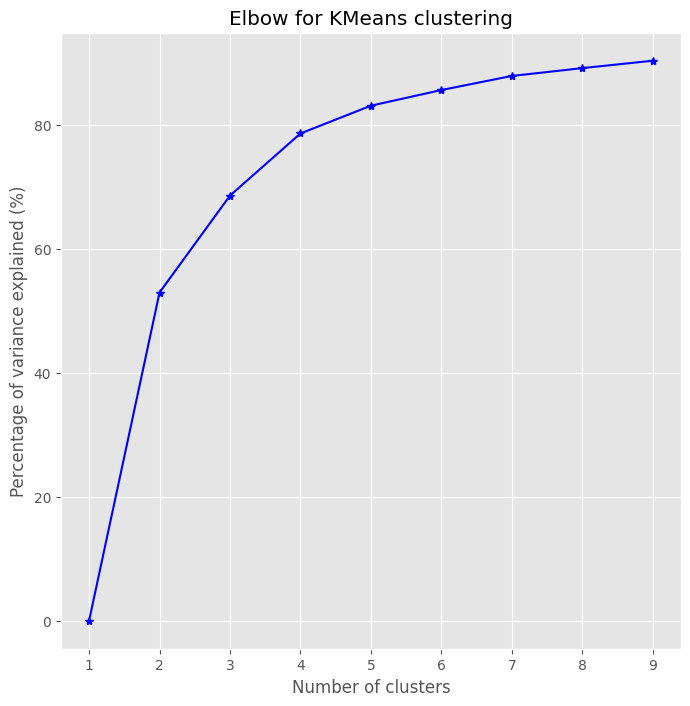

In [ ]:
def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X)

In [ ]:
def plot_stations_map(ax, stns):
    # determine range to print based on min, max lat and lon of the data
    lat = list(stns['station latitude'])
    lon = list(stns['station longitude'])
    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='lcc',
                resolution = 'f',)

    m.drawcoastlines()
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()

    # plot points
    clist = list(stns['cluster'].unique())
    if -1 in clist:
        clist.remove(-1)
    k = len(clist)
    colors = iter(cm.Set1(np.linspace(0, 1, max(10, k))))
    for i in range(k):
        color = next(colors)
        df = stns.loc[stns['cluster'] == clist[i]]
        #print("Cluster {} has {} samples.".format(clist[i], df.shape[0]))

        # convert lat and lon to map projection coordinates
        lons, lats = m(list(df['station longitude']), list(df['station latitude']))
        ax.scatter(lons, lats, marker = 'o', color=color, edgecolor='gray', zorder=5, alpha=1.0, s=15)

In [ ]:
pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 7.3 MB/s eta 0:00:00


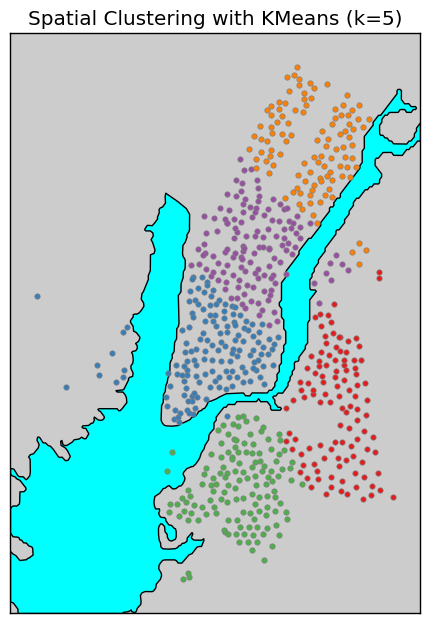

In [ ]:
k = [5]
n = len(k)
plt.subplots(nrows=1, ncols=1, figsize=(18,15))

for i in range(n):
    est = kmean[k[i]-1]
    df_loc['cluster'] = est.predict(X).tolist()

    ax = plt.subplot(1, 3, i+1)
    ax.set_title("Spatial Clustering with KMeans (k={})".format(k[i]))

    plot_stations_map(ax, df_loc)

In [ ]:
def combine_spatial_temporal(X, n_temporal):
    pca = PCA(n_components=n_temporal)
    X_pca = pca.fit_transform(X[:, 3:])  # Comenzar desde la columna del timestamp
    X = np.hstack((X[:, :3], X_pca))  # Mantener las primeras 3 columnas (coordenadas y timestamp)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    return X_std

In [ ]:
def plot_spatial_temporal_clustering_result(kmean, n_components, k, Xs, df_all):
    n = len(n_components)
    plt.subplots(nrows=n, ncols=2, figsize=(20,15))

    for i in range(n):
        est = kmean[i]
        df_all['cluster'] = est.predict(Xs[i]).tolist()

        ax = plt.subplot(n, 2, 2*i+1)
        ax.set_title("Spatial-Temporal Clustering with KMeans (#temporal features={}, k={})".format(n_components[i], k))
        plot_stations_map(ax, df_all)

        ax = plt.subplot(n, 2, 2*i+2)
        ax.set_title("Average Flow for each cluster (#temporal features={}, k={})".format(n_components[i], k))
        plot_flow_lines(ax, df_all)

In [ ]:
X_numeric = np.array([
    [row[0], row[1], row[2].timestamp(), row[3], row[4]]
    for row in X
], dtype=np.float)

NameError: ignored

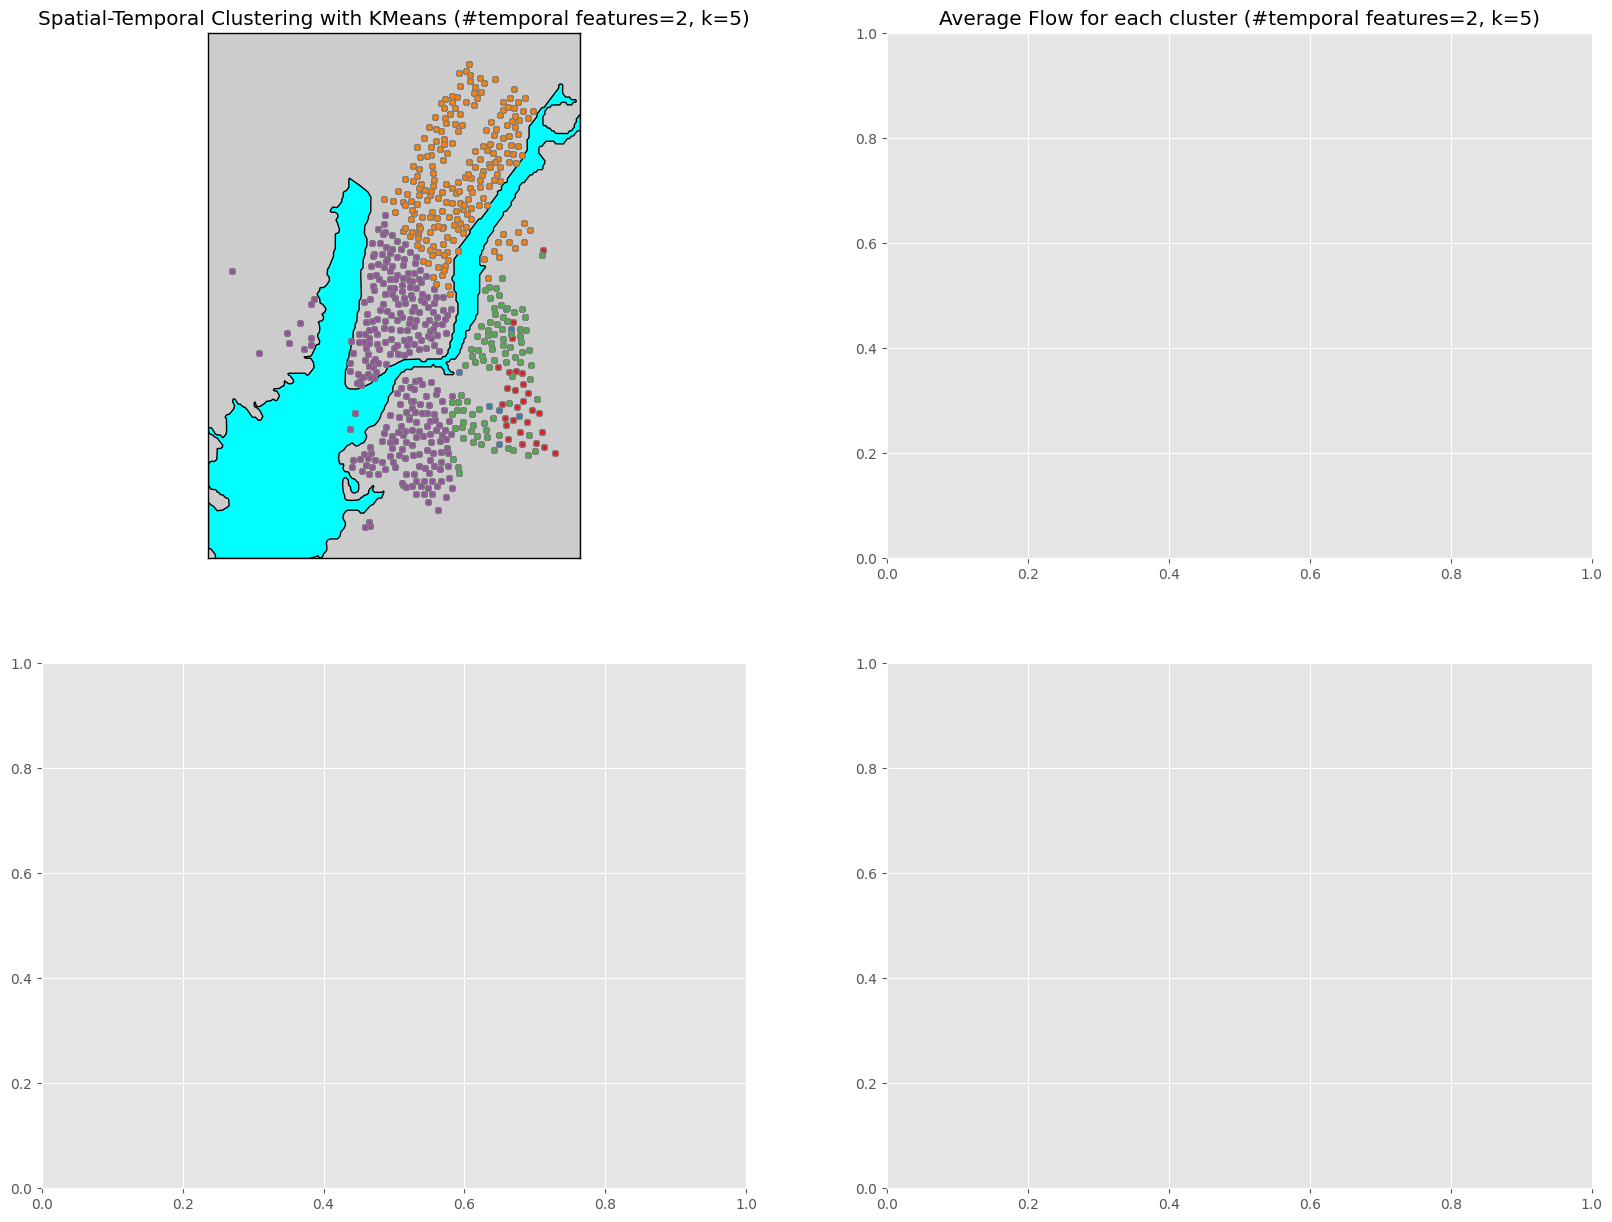

In [ ]:
k = 5
n_components = [2, 1]
Xs = [combine_spatial_temporal(X_numeric, i) for i in n_components]
kmean = [KMeans(n_clusters=k).fit(data) for data in Xs]
plot_spatial_temporal_clustering_result(kmean, n_components, k, Xs, df_all)

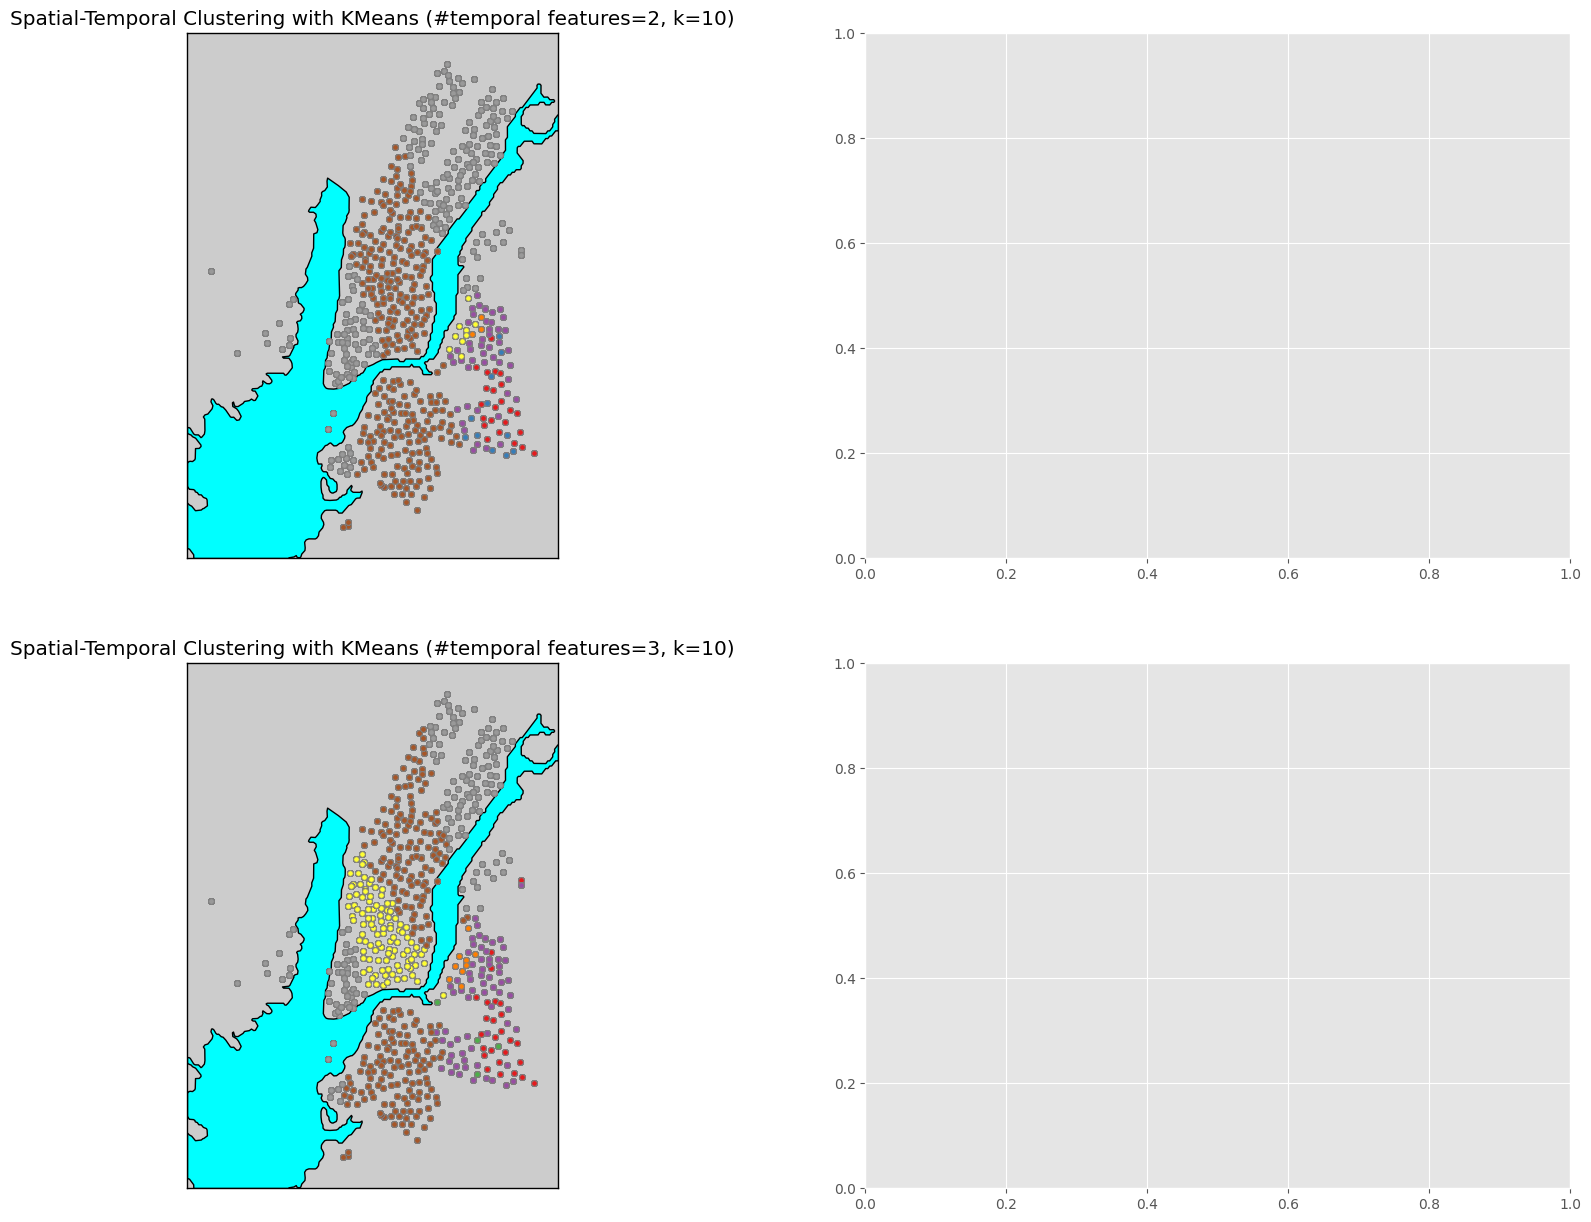

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes el DataFrame df_all con la estructura que proporcionaste

def combine_spatial_temporal(X, n_temporal):
    pca = PCA(n_components=n_temporal)
    X_pca = pca.fit_transform(X[:, 2:])  # Comenzar desde la columna del timestamp
    X = np.hstack((X[:, :2], X_pca))  # Mantener las primeras 2 columnas (coordenadas)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    return X_std

def plot_spatial_temporal_clustering_result(kmean, n_components, k, Xs, df_all):
    n = len(n_components)
    plt.subplots(nrows=n, ncols=2, figsize=(20, 15))

    for i in range(n):
        est = kmean[i]
        df_all['cluster'] = est.predict(Xs[i]).tolist()

        ax = plt.subplot(n, 2, 2*i+1)
        ax.set_title("Spatial-Temporal Clustering with KMeans (#temporal features={}, k={})".format(n_components[i], k))
        plot_stations_map(ax, df_all)  # Supongamos que tienes una función para graficar las estaciones en un mapa

# Suponiendo que X contiene las características necesarias (latitud, longitud, timestamp, in_flow_count, out_flow_count)
X = df_all.drop(["station id", "station name", "time"], axis=1).values
k = 10
n_components = [2, 3]
Xs = [combine_spatial_temporal(X, i) for i in n_components]
kmean = [KMeans(n_clusters=k).fit(data) for data in Xs]
plot_spatial_temporal_clustering_result(kmean, n_components, k, Xs, df_all)


In [ ]:
n_spatial_features = 2  # Número de características espaciales (longitud y latitud)
n_temporal_features = df_all.shape[1] - n_spatial_features

print("Número de características temporales:", n_temporal_features)

Número de características temporales: 8


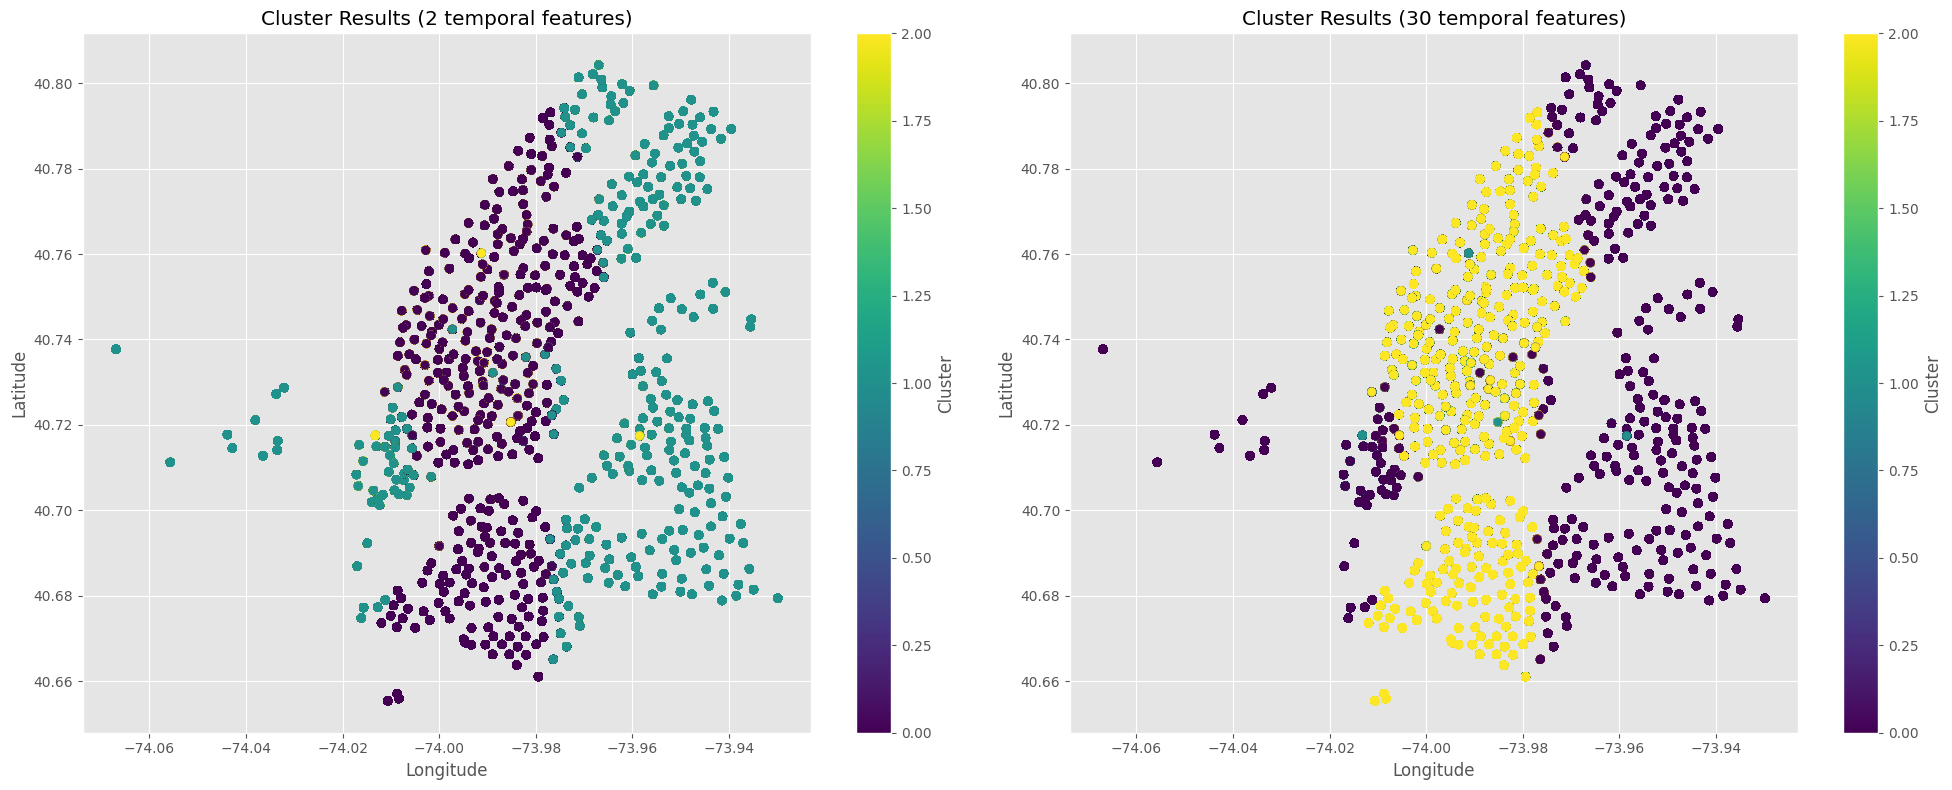

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar tu DataFrame df_all
# ...

# Definir las combinaciones de características
n_spatial = 2
n_temporal_1 = 2
n_temporal_2 = 2

# Extraer características espaciales y temporales
X = df_all.drop(["station id", "station name", "time"], axis=1).values

# Normalizar las características espaciales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, :n_spatial])

# Realizar clustering con 2 características temporales
pca_1 = PCA(n_components=n_temporal_1)
X_pca_1 = pca_1.fit_transform(X[:, n_spatial:])
X_combined_1 = np.hstack((X_scaled, X_pca_1))

kmeans_1 = KMeans(n_clusters=3)
labels_1 = kmeans_1.fit_predict(X_combined_1)

# Realizar clustering con 30 características temporales
pca_2 = PCA(n_components=n_temporal_2)
X_pca_2 = pca_2.fit_transform(X[:, n_spatial:])
X_combined_2 = np.hstack((X_scaled, X_pca_2))

kmeans_2 = KMeans(n_clusters=3)
labels_2 = kmeans_2.fit_predict(X_combined_2)

# Agregar las etiquetas de los clusters al DataFrame original
df_all['cluster_1'] = labels_1
df_all['cluster_2'] = labels_2

# Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(df_all['station longitude'], df_all['station latitude'], c=labels_1, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Results (2 temporal features)')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(df_all['station longitude'], df_all['station latitude'], c=labels_2, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Results (30 temporal features)')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()
